In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix

In [2]:
zoo_data= pd.read_csv(r"C:\Users\admin\Desktop\Excelr Assignments\Assignment 14\Zoo.csv")
zoo_data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
zoo_data.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [4]:
zoo_data.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
zoo_data.describe(include='all')

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
unique,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,frog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,NaN,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,NaN,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000


In [6]:
import warnings
warnings.filterwarnings('ignore')

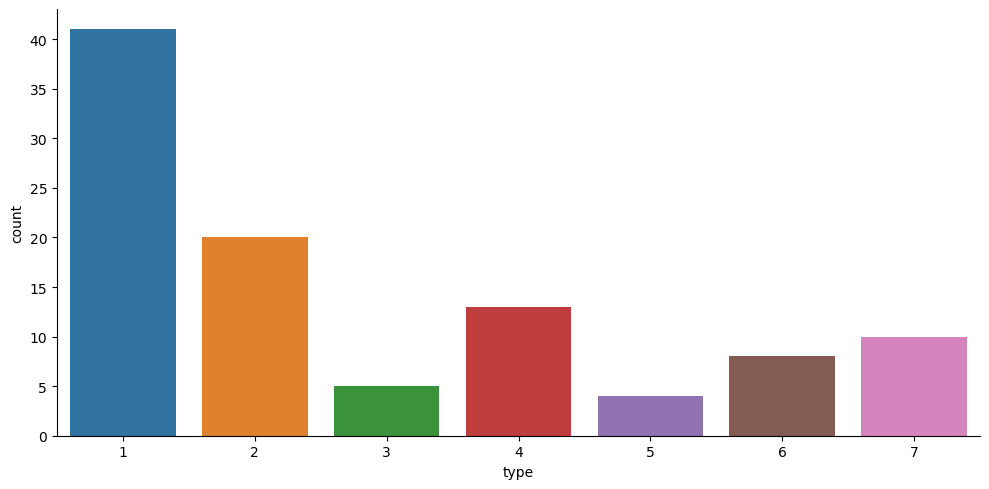

In [7]:
sns.factorplot('type', data=zoo_data, kind="count",size = 5,aspect = 2)
plt.show()

In [8]:
zoo_data.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [9]:
del zoo_data['animal name']
zoo_data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [10]:
X = zoo_data.drop('type',axis=1)
y = zoo_data[['type']]

In [11]:
#Generating a model with STANDARDIZATION
scaler= StandardScaler()
scaledX= scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(scaledX,y,test_size=0.20,random_state=12,stratify=y)
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((80, 16), (80, 1), (21, 16), (21, 1))

In [12]:
# Finding optimum K values
neighbours = list(range(1,25,))
cv_scores = []

for i in neighbours:
    #print(i)
    knn_model = KNeighborsClassifier(n_neighbors = i)
    cv_score = cross_val_score(estimator = knn_model,X=scaledX,y=y,cv=10)
    #print(i,'-',cv_score.mean())
    cv_scores.append(cv_score.mean())

In [13]:
cv_scores

[0.9509090909090909,
 0.9400000000000001,
 0.93,
 0.9100000000000001,
 0.9400000000000001,
 0.9200000000000002,
 0.9200000000000002,
 0.9100000000000001,
 0.89,
 0.8800000000000001,
 0.860909090909091,
 0.850909090909091,
 0.860909090909091,
 0.860909090909091,
 0.850909090909091,
 0.860909090909091,
 0.860909090909091,
 0.8709090909090909,
 0.860909090909091,
 0.860909090909091,
 0.8418181818181818,
 0.8218181818181819,
 0.8218181818181819,
 0.8218181818181819]

In [14]:
neighbours[cv_scores.index(max(cv_scores))]

1

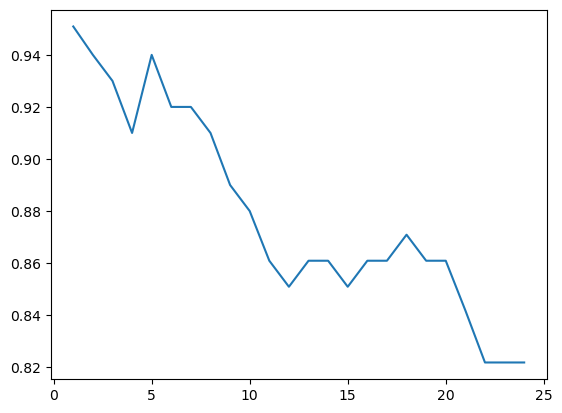

In [23]:
#Vizualizing the K neighbours wrt CV
plt.plot(neighbours,cv_scores)
plt.show()

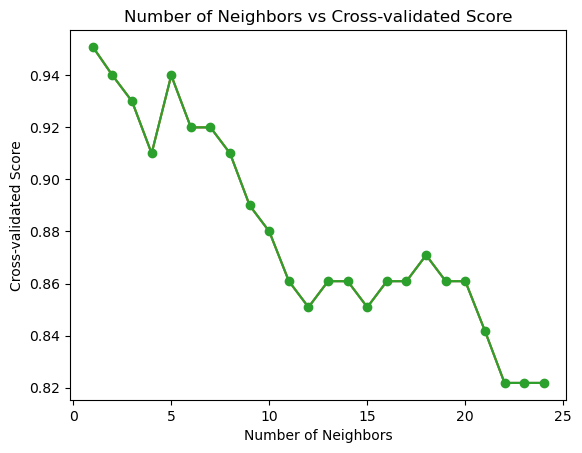

In [22]:
# Assuming 'neighbours' and 'cv_scores' are lists or arrays containing your data
neighbours = list(range(1,25,))  
cv_scores = [0.9509090909090909,
 0.9400000000000001,
 0.93,
 0.9100000000000001,
 0.9400000000000001,
 0.9200000000000002,
 0.9200000000000002,
 0.9100000000000001,
 0.89,
 0.8800000000000001,
 0.860909090909091,
 0.850909090909091,
 0.860909090909091,
 0.860909090909091,
 0.850909090909091,
 0.860909090909091,
 0.860909090909091,
 0.8709090909090909,
 0.860909090909091,
 0.860909090909091,
 0.8418181818181818,
 0.8218181818181819,
 0.8218181818181819,
 0.8218181818181819]  

# Plot the data
plt.plot(neighbours, cv_scores, marker='o')

# Add labels and title
plt.xlabel('Number of Neighbors')
plt.ylabel('Cross-validated Score')
plt.title('Number of Neighbors vs Cross-validated Score')

# Show the plot
plt.show()


In [16]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install --upgrade threadpoolctl

Note: you may need to restart the kernel to use updated packages.


In [18]:
conda install -c conda-forge libopenblas

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\admin\anaconda3

  added / updated specs:
    - libopenblas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.11.17 |       h56e8100_0         151 KB  conda-forge
    certifi-2023.11.17         |     pyhd8ed1ab_0         155 KB  conda-forge
    conda-22.9.0               |   py39hcbf5309_2         985 KB  conda-forge
    libflang-5.0.0             |h6538335_20180525         519 KB  conda-forge
    libopenblas-0.3.21         |pthreads_h02691f0_2         5.7 MB  conda-forge
    llvm-meta-5.0.0            |                0           3 KB  conda-forge
    openm



==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [19]:
import os

os.environ['OMP_NUM_THREADS'] = '1'


In [20]:
#Rebuilding the moddel with K=1 
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.9524
